**Pairplot and correlation heatmap generation**

Follow this step before running this code:

•	Remove all columns except target variables- Mass (g), Major dia (mm), and Minor dia (mm).

•	Upload the file in “Spectra_Visualization_Dataset” and run the code.


<ipython-input-3-290015e73280>:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((j, i), 1, 1, fill=True, color=row_colors[i][j], edgecolor='black', lw=0.5)


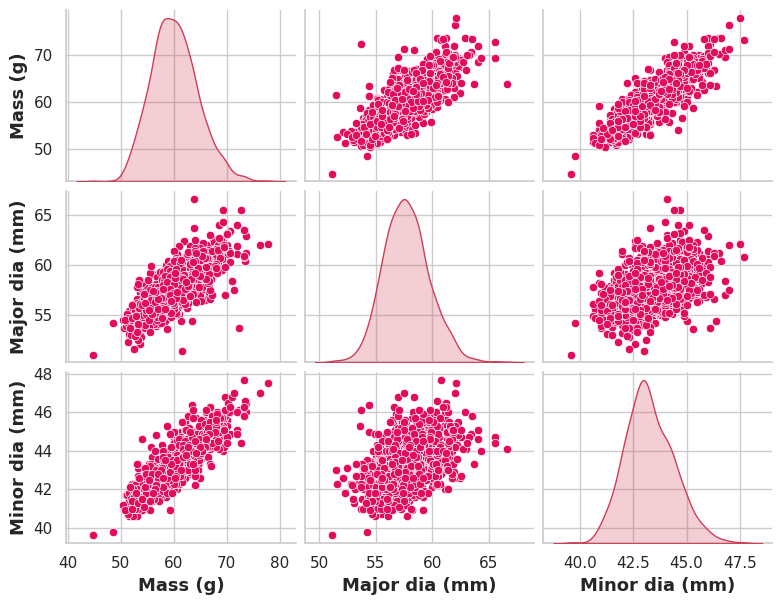

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors  # Importing mcolors to fix NameError

# Load your egg dataset
file_path = '/content/Data_cor.ana.csv'  # Replace with actual path
egg_data = pd.read_csv(file_path)

# Rename columns for easier reference if necessary
egg_data.columns = ['Mass (g)', 'Major dia (mm)', 'Minor dia (mm)']

# Set Seaborn plot style
sns.set(style="whitegrid")

# 1. Pair Plot (Dark Blue and Maroon)
pair_plot = sns.pairplot(egg_data, kind="scatter", diag_kind="kde", markers="o",
                         plot_kws={'color': '#E30B5C'},  # raspberry hex code for markers
                         diag_kws={'color': '#D03D56'})  # Maroon hex code

# Customize font sizes, bold axis labels, and adjust figure size
pair_plot.fig.set_size_inches(8, 6)  # Smaller plot size
for ax in pair_plot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=13, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=13, fontweight='bold')

# 2. Correlation Heatmap
# Calculate correlation matrix
corr = egg_data.corr()

# Define a custom colormap for each row
row_colors = [
    ["#E30B50", "#66CDAA", "#069494"],  # Row 1: Raspberry, Forest Green, Raspberry
    ["#66CDAA", "#E30B50", "#F0F3F3"],  # Row 2: Bright Blue, Light Green, Raspberry
    ["#069494", "#F0F3F3", "#E30B50"]   # Row 3: Dark Navy, Dark Green, Raspberry
]

# Create a figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(8, 6), dpi=1500)

# Draw custom background rectangles for each cell
for i in range(len(corr)):
    for j in range(len(corr.columns)):
        rect = plt.Rectangle((j, i), 1, 1, fill=True, color=row_colors[i][j], edgecolor='black', lw=0.5)
        ax.add_patch(rect)

# Overlay the heatmap without background color interference
sns.heatmap(
    corr, annot=True, fmt=".2f", linewidths=0.5, linecolor='black',
    cmap="coolwarm", vmin=-1, vmax=1, annot_kws={'fontsize': 14, 'fontweight': 'bold'},
    cbar=False, mask=np.zeros_like(corr, dtype=bool), ax=ax, alpha=0  # Fully transparent overlay
)

# Customize font sizes and styles for better readability
plt.xticks(fontsize=12, fontweight='bold')  # Rotated for readability
plt.yticks(fontsize=12, fontweight='bold')

# Save the heatmap with very high DPI for journal-quality clarity
plt.savefig("heatmap.png", dpi=1500, bbox_inches='tight', transparent=True)

# Show the heatmap
plt.show()